In [2]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sn
import os


In [3]:

def calculate_percentage_changes(df):
    """
    Takes a DataFrame and calculates both index-to-index percent changes 
    and cumulative percent changes.

    Args:
    df (pd.DataFrame): DataFrame containing values.

    Returns:
    Tuple[pd.DataFrame, pd.DataFrame]: A tuple containing two DataFrames.
        - The first DataFrame contains index-to-index percent changes.
        - The second DataFrame contains cumulative percent changes.
    """
    # Calculate index-to-index percent change
    index_to_index_pct_change_df = df.pct_change() * 100

    # Convert index-to-index percent change to growth factor (1 + percentage change/100)
    growth_factor_df = 1 + index_to_index_pct_change_df / 100

    # Calculate cumulative product
    cumulative_growth_df = growth_factor_df.cumprod()

    # Convert back to cumulative percentage change
    cumulative_percentage_change_df = (cumulative_growth_df - 1) * 100

    return index_to_index_pct_change_df, cumulative_percentage_change_df


In [4]:
  ROOT='./kaggle/input/dt23-test/'
  adjusted_close_df = pd.read_csv(ROOT+'series/adjusted_close.csv',index_col=0)
  adjusted_close_df.index = pd.to_datetime(adjusted_close_df.index)
  adjusted_close_df = adjusted_close_df.sort_index(ascending=True).replace([np.inf, -np.inf], np.nan).interpolate(method='linear').fillna(0)

  # close_df = pd.read_csv(ROOT+'series/close.csv', index_col = 0)
  # close_df.index = pd.to_datetime(close_df.index)
  # Uncomment the following line to test the notebook on a reduced number of 
  # products that span the entire makespan
  # adjusted_close_df = adjusted_close_df.dropna(axis=1).iloc[:,:20]

  print(adjusted_close_df.head())


            adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR  \
timestamp                                                                  
1999-11-01            25.121693                  0.0                 0.0   
1999-11-02            25.335406                  0.0                 0.0   
1999-11-03            24.646007                  0.0                 0.0   
1999-11-04            24.128958                  0.0                 0.0   
1999-11-05            25.314724                  0.0                 0.0   

            adjusted_close_DVN  adjusted_close_MRO  adjusted_close_BA  \
timestamp                                                               
1999-11-01           12.686863            5.197426          28.661792   
1999-11-02           12.686863            5.075071          27.859031   
1999-11-03           12.624865            4.920797          27.775543   
1999-11-04           12.706442            4.915478          27.859031   
1999-11-05           12.46171

In [5]:

# def polynomial_regression(past_prices):
#     """
#         Fits a 3d degree polynomial for each asset and returns the predicted value
#     """
#     past_prices.index = pd.to_datetime(past_prices.index)

#     models={}

#     # Fitting a 3d degree polynomial for each asset
#     for c in past_prices.columns:
#         x=past_prices[[c]]
#         xp = PolynomialFeatures(degree=3).fit_transform(np.arange(len(x)).reshape((len(x),1)))
#         model = sm.OLS(x.values, xp).fit()
#         models[c] = model

#     # Returning the next value of each polynomial
#     return pd.DataFrame({k:v.predict(PolynomialFeatures(degree=3).fit_transform(np.array([len(x)]).reshape((1,1)))) for k,v in models.items()})/past_prices.iloc[-1]

# poly_df = polynomial_regression(adjusted_close_df)

# print(poly_df.head())
  

   adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR  \
0             1.003303             1.127389             1.15964   

   adjusted_close_DVN  adjusted_close_MRO  adjusted_close_BA  \
0            1.027551            0.720875           1.198154   

   adjusted_close_GILD  adjusted_close_MDT  adjusted_close_V  \
0             0.853111            1.384409          1.107544   

   adjusted_close_A  ...  adjusted_close_CI  adjusted_close_BALL  \
0          1.386584  ...           1.003591             1.728672   

   adjusted_close_JNJ  adjusted_close_DOV  adjusted_close_CRM  \
0            1.145316            1.177253            1.168486   

   adjusted_close_PGR  adjusted_close_WAT  adjusted_close_BWA  \
0            1.014674            1.300431             0.81643   

   adjusted_close_BLK  adjusted_close_PPL  
0            1.233056            1.194925  

[1 rows x 303 columns]


In [6]:
# adjusted_close_df['daily_sum'] = adjusted_close_df.sum(axis=1)
# # close_df['daily_sum'] = close_df.sum(axis=1)

# adjusted_close_df.head()


# # Assuming you have already calculated 'daily_sum' for both dataframes
# # adjusted_close_df and close_df

# # Plotting the 'daily_sum' from adjusted_close_df
# plt.plot(adjusted_close_df['daily_sum'], label='Adjusted Close Daily Sum')

# # Plotting the 'daily_sum' from close_df
# plt.plot(close_df['daily_sum'], label='Close Daily Sum')

# # Adding labels and a legend
# plt.xlabel('Date')
# plt.ylabel('Daily Sum')
# plt.legend()

# # Display the plot
# plt.show()


,adjusted_close_CSCO,adjusted_close_ISRG,adjusted_close_TPR,adjusted_close_DVN,adjusted_close_MRO,adjusted_close_BA,adjusted_close_GILD,adjusted_close_MDT,adjusted_close_V,adjusted_close_A,...,adjusted_close_BALL,adjusted_close_JNJ,adjusted_close_DOV,adjusted_close_CRM,adjusted_close_PGR,adjusted_close_WAT,adjusted_close_BWA,adjusted_close_BLK,adjusted_close_PPL,daily_sum
timestamp,,,,,,,,,,,,,,,,,,,,,
1999-11-01,25.121693,0.0,0.0,12.686863,5.197426,28.661792,1.482176,23.654637,0.0,0.0,...,1.984462,28.614041,18.025328,0.0,4.407378,25.280,3.387052,9.219344,4.489261,5695.384133
1999-11-02,25.335406,0.0,0.0,12.686863,5.075071,27.859031,1.148247,24.066253,0.0,0.0,...,1.969106,27.906177,18.480253,0.0,4.440344,23.405,3.423573,9.219344,4.479307,5693.073700
1999-11-03,24.646007,0.0,0.0,12.624865,4.920797,27.775543,1.168869,25.022264,0.0,0.0,...,1.987930,28.396237,18.669090,0.0,4.413589,23.250,3.434614,9.219344,4.459399,5711.522152
1999-11-04,24.128958,0.0,0.0,12.706442,4.915478,27.859031,1.098568,25.022264,0.0,0.0,...,1.953749,28.668492,18.617589,0.0,4.452288,23.345,3.434614,9.338102,4.417924,5708.082128
1999-11-05,25.314724,0.0,0.0,12.461711,4.853413,28.456285,1.094115,25.148404,0.0,0.0,...,1.959694,28.722943,18.832176,0.0,4.541630,22.595,3.439710,9.844385,4.417924,5783.618615


In [7]:

# # Read the market_cap.csv file and set the 'date' column as the index
# market_cap_df = pd.read_csv(ROOT + 'series/additional_data/market_cap.csv')
# market_cap_df['date'] = pd.to_datetime(market_cap_df['date'])  # Convert 'date' to datetime
# market_cap_df.set_index('date', inplace=True)

# # Calculate the 'daily_sum' column
# market_cap_df['daily_sum'] = market_cap_df.sum(axis=1)

# # Sort the DataFrame by 'date' in ascending order
# market_cap_df.sort_index(inplace=True)


# # Align the two DataFrames to only include the common dates
# common_market_cap, common_adjusted_close = market_cap_df.align(adjusted_close_df, join='inner', axis=0)

# # Plotting the 'daily_sum' for common dates
# plt.plot(common_market_cap.index, common_market_cap['daily_sum'], label='Market Cap Daily Sum')
# plt.plot(common_adjusted_close.index, common_adjusted_close['daily_sum'], label='Adjusted Close Daily Sum')

# # Adding labels and a legend
# plt.xlabel('Date')
# plt.ylabel('Daily Sum')
# plt.legend()

# # Display the plot
# plt.show()


            percentage_variation_CSCO  percentage_variation_ISRG  \
timestamp                                                          
1999-11-01                   0.000000                        0.0   
1999-11-02                   0.850714                        0.0   
1999-11-03                  -2.721088                        0.0   
1999-11-04                  -2.097902                        0.0   
1999-11-05                   4.914286                        0.0   

            percentage_variation_TPR  
timestamp                             
1999-11-01                       0.0  
1999-11-02                       0.0  
1999-11-03                       0.0  
1999-11-04                       0.0  
1999-11-05                       0.0  
            adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR
timestamp                                                               
1999-11-01            25.121693                  0.0                 0.0
1999-11-02            25.335406

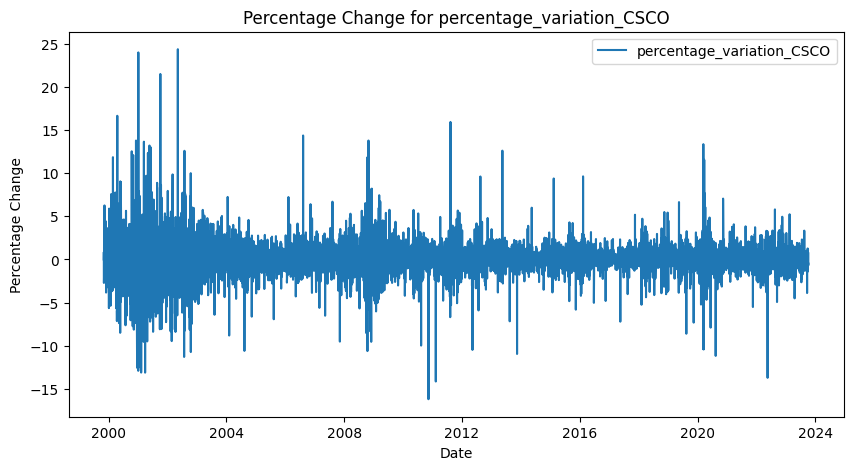

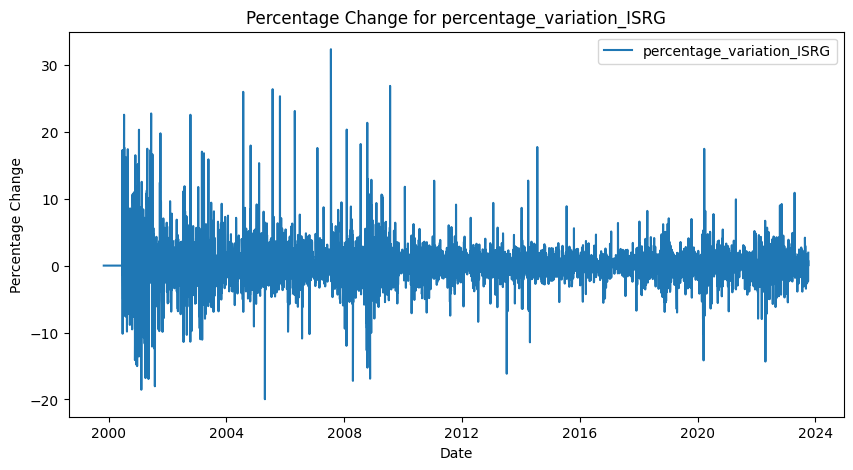

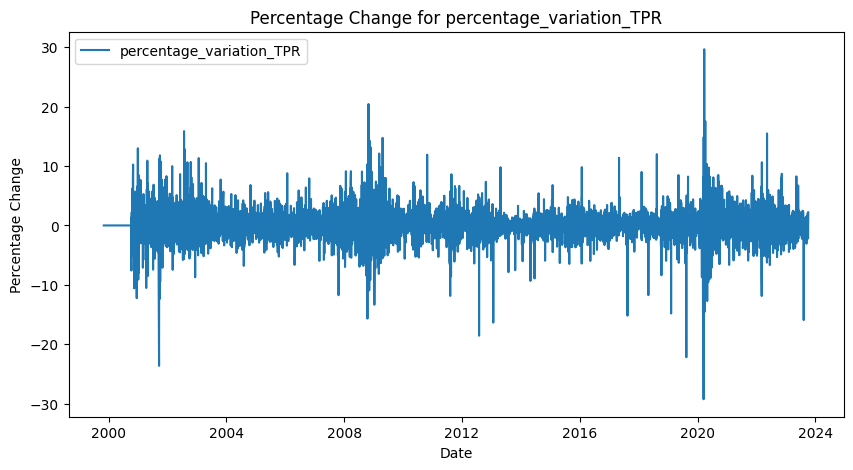

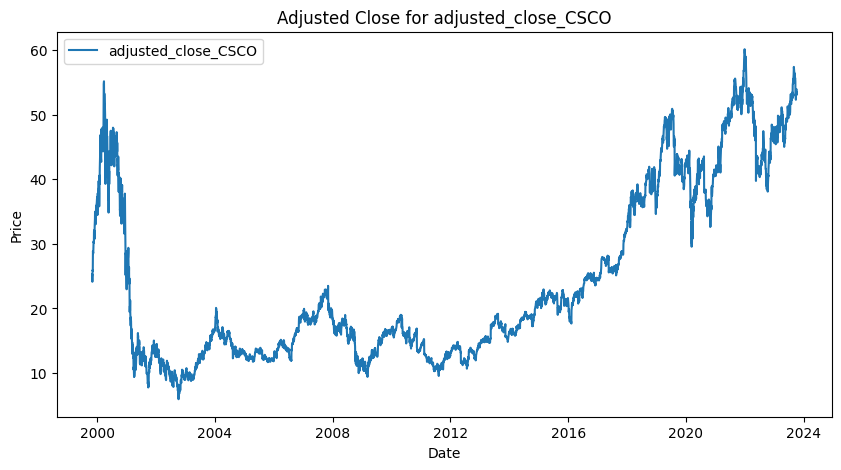

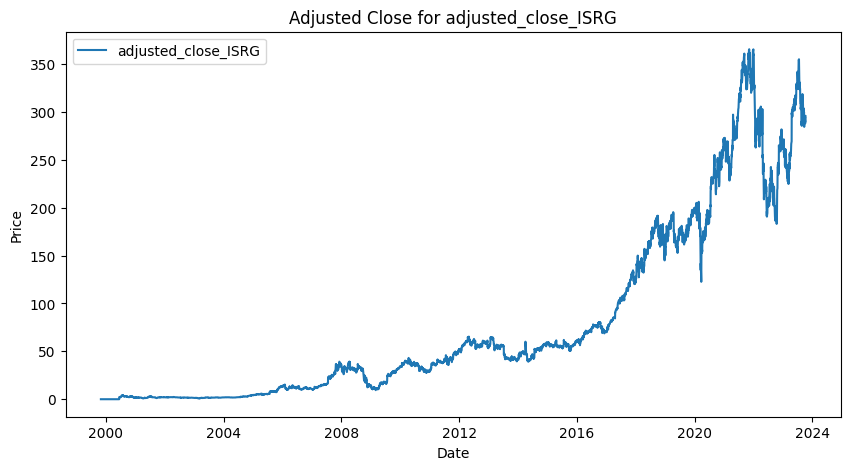

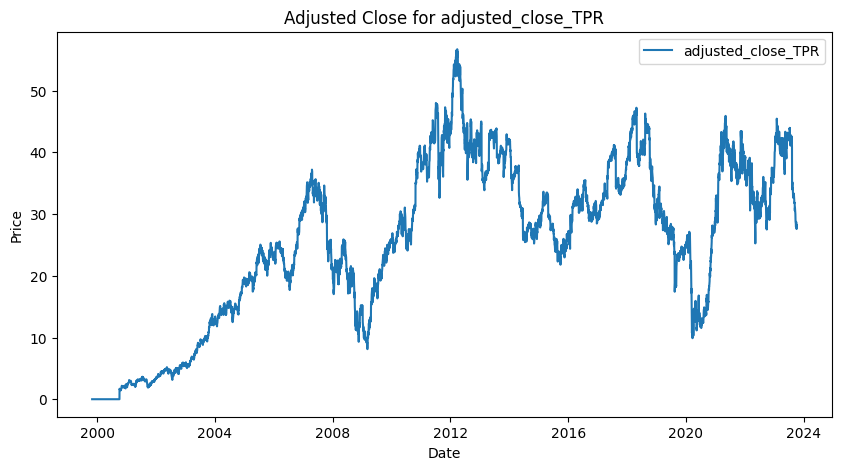

In [8]:
# Calculate percentage change
percentage_returns_df = adjusted_close_df.pct_change() * 100
# Replace inf values with 0 in the resulting DataFrame
percentage_returns_df.replace([np.inf, -np.inf], 0, inplace=True)

# Rename columns by replacing 'adjusted_close' with 'percentage_variation'
percentage_returns_df.columns = percentage_returns_df.columns.str.replace('adjusted_close', 'percentage_variation')

# Fill missing values in percentage_returns_df using linear interpolation
percentage_returns_df = percentage_returns_df.fillna(0)

# Print the first 3 columns of percentage_returns_df
print(percentage_returns_df.iloc[:, :3].head())

# Print the first 3 columns of adjusted_close_df
print(adjusted_close_df.iloc[:, :3].head())

# Create separate plots for the first 3 columns of percentage_returns_df
for col in percentage_returns_df.columns[:3]:
    plt.figure(figsize=(10, 5))
    plt.plot(percentage_returns_df.index, percentage_returns_df[col], label=col)
    plt.title(f'Percentage Change for {col}')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.show()

# Create separate plots for the first 3 columns of adjusted_close_df
for col in adjusted_close_df.columns[:3]:
    plt.figure(figsize=(10, 5))
    plt.plot(adjusted_close_df.index, adjusted_close_df[col], label=col)
    plt.title(f'Adjusted Close for {col}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


            Unnamed: 0        open        high         low       close  \
timestamp                                                                
1999-11-01        6031  136.500000  137.000000  135.562500  135.562500   
1999-11-02        6030  135.968704  137.250000  134.593704  134.593704   
1999-11-03        6029  136.000000  136.375000  135.125000  135.500000   
1999-11-04        6028  136.750000  137.359299  135.765594  136.531204   
1999-11-05        6027  138.625000  139.109299  136.781204  137.875000   

            adjusted_close   volume  dividend  split  percentage_variation  
timestamp                                                                   
1999-11-01       87.576805  4006500       0.0    1.0              0.000000  
1999-11-02       86.950938  6516900       0.0    1.0             -0.714649  
1999-11-03       87.536428  7222300       0.0    1.0              0.673357  
1999-11-04       88.202612  7907500       0.0    1.0              0.761036  
1999-11-05       89

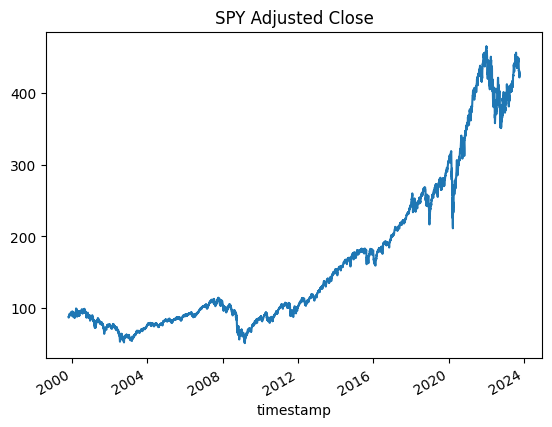

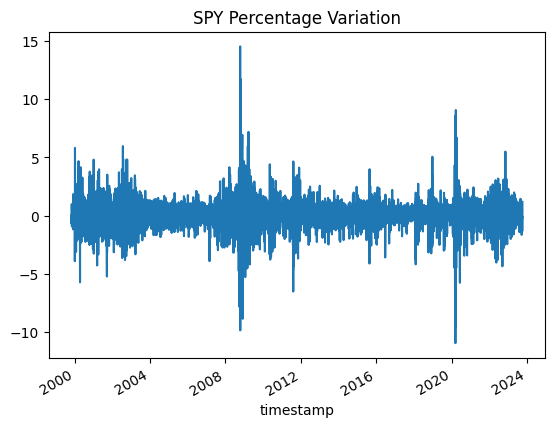

In [9]:
# data for SPY500 stock
spy_df = pd.read_csv(ROOT + '/series/benchmark/SPY.csv')
spy_df['timestamp'] = pd.to_datetime(spy_df['timestamp'])  # Convert 'timestamp' to datetime
spy_df.set_index('timestamp', inplace=True)
spy_df = spy_df.sort_index(ascending=True)
spy_df.interpolate(method='linear',inplace=True)

# The column names should be in quotes to be recognized as strings
spy_df.drop(columns=spy_df.columns.difference(['adjusted_close']))
# Assuming percentage_returns_df is another DataFrame indexed by dates
# Find common dates in spy_df and percentage_returns_df
common_dates = spy_df.index.intersection(percentage_returns_df.index)

# Keep only the rows with common dates
spy_df = spy_df.loc[common_dates]

# Calculate the percentage change for the adjusted_close in spy_df
spy_df['percentage_variation'] = spy_df['adjusted_close'].pct_change() * 100
spy_df.fillna(0,inplace=True)
print(spy_df.head())
# Plot the adjusted close
spy_df['adjusted_close'].plot(title='SPY Adjusted Close')
plt.show()

# Plot the percentage variation
spy_df['percentage_variation'].plot(title='SPY Percentage Variation')
plt.show()

In [10]:
percentage_returns_df['percentage_variation_SPY500'] = spy_df['percentage_variation']
adjusted_close_df['adjusted_close_SPY500'] = spy_df['adjusted_close']

print(percentage_returns_df.tail())
print(adjusted_close_df.head())

            percentage_variation_CSCO  percentage_variation_ISRG  \
timestamp                                                          
2023-10-02                   1.171875                   0.920319   
2023-10-03                  -0.643501                  -2.352702   
2023-10-04                  -0.372787                   0.777670   
2023-10-05                  -0.710945                  -0.065454   
2023-10-06                   0.716035                   1.926988   

            percentage_variation_TPR  percentage_variation_DVN  \
timestamp                                                        
2023-10-02                 -0.591304                 -4.297694   
2023-10-03                 -2.204339                  0.219058   
2023-10-04                 -0.393560                 -5.245902   
2023-10-05                 -0.933908                 -1.153403   
2023-10-06                  2.211748                  1.983664   

            percentage_variation_MRO  percentage_variation_B

In [11]:
def corr_heatmap(df):
    # Reset the index to remove it from the correlation calculation
    df_reset_index = df.reset_index(drop=True)
    
    graph_size = (12, 12)
    fig, ax = plt.subplots(figsize=graph_size)
    sn.heatmap(df_reset_index.corr(), ax=ax, vmin=-1, vmax=1, cmap='coolwarm')
    plt.show()


## Breaking the data per into per industry

In [18]:
# code to separate stocks per industry
# Load and sort the SP500 symbol information
spy_symbols_info_df = pd.read_csv(ROOT + '/series/additional_data/SP500_symbol_info.csv', index_col =0 )
spy_symbols_info_df = spy_symbols_info_df.sort_values('Symbol')

# print(temp_df.head())

# # Extract unique industries
# industries = set(spy_symbols_info_df['GICS Sector'])

# # Process each industry
# for industry in industries:
#     # Find the symbols in this industry
#     industry_symbols = spy_symbols_info_df[spy_symbols_info_df['GICS Sector'] == industry]['Symbol']

#     # Columns to keep (intersection of symbols in industry and columns in temp_df)
#     columns_to_keep = [f'adjusted_close_{symbol}' for symbol in industry_symbols if f'adjusted_close_{symbol}' in adjusted_close_df.columns]
#     columns_to_keep.append( 'adjusted_close_SPY500')

#     # Create a dataframe for this industry using loc to keep the index
#     industry_df = adjusted_close_df.loc[:, columns_to_keep]

#     # Save this dataframe to CSV
#     industry_df.to_csv(f'{ROOT}/series/adjusted_close_per_industry/{industry}_adjusted_close.csv', index=True)


In [19]:
# # Create an empty dictionary to store DataFrames
# dfs_per_industry = {}

# #  Iterate through CSV files in the specified directory
# for filename in os.listdir(f'{ROOT}/series/adjusted_close_per_industry'):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(f'{ROOT}/series/adjusted_close_per_industry', filename)
        
#         # Read the CSV file into a DataFrame and save it with the filename as the variable name
#         df_name = os.path.splitext(filename)[0] + '_df'
#         dfs_per_industry[df_name] = pd.read_csv(file_path)

# # # Now you have a dictionary 'dfs_per_industry' where each DataFrame is stored with its filename as the key

# # # Iterate through DataFrames in the 'dfs_per_industry' dictionary and create correlation heatmaps
# # for df_name, df in dfs_per_industry.items():
# #     df.drop('timestamp', axis=1, inplace=True)
# #     print(f"Correlation Heatmap for {df_name}:")
# #     corr_heatmap(df)

In [20]:
# # Assuming dfs_per_industry is a dictionary where keys are dataframe names and values are dataframes

# # Create an empty dictionary to store the results for each dataframe
# result_dict = {}

# for dfname, df in dfs_per_industry.items():
#     # Calculate the absolute correlations
#     corr_values = df.corr()['adjusted_close_SPY500']
    
#     # Create a copy of the original correlation values and sort it by absolute values
#     sorted_corr_values = corr_values.abs().sort_values(ascending=False)
    
#     # Store the result in the dictionary with the dataframe name as the key
#     result_dict[dfname] = (corr_values, sorted_corr_values)

# # Print the results
# for dfname, (original_corr_values, sorted_corr_values) in result_dict.items():
#     print(f"DataFrame: {dfname}")
#     print("Top columns with highest absolute correlation and their values:")
#     for column, correlation_value in sorted_corr_values.items():
#         print(f"{column}: {original_corr_values[column]}")
#     print()


In [30]:

spy_symbols_info_df['correlation_with_spy'] = 0
print(spy_symbols_info_df.head())
list_symbols = set(spy_symbols_info_df['Symbol'])

for symbol in list_symbols:
    try:
        corr = adjusted_close_df[f'adjusted_close_{symbol}'].corr(adjusted_close_df['adjusted_close_SPY500'])
        spy_symbols_info_df.loc[spy_symbols_info_df['Symbol'] == symbol, 'correlation_with_spy'] = corr
    except: pass
spy_symbols_info_df.to_csv(ROOT + '/series/additional_data/SP500_symbol_info.csv', index=False)




   Symbol              Security             GICS Sector  \
10      A  Agilent Technologies             Health Care   
42   AAPL            Apple Inc.  Information Technology   
2     ABT                Abbott             Health Care   
4     ACN             Accenture  Information Technology   
6    ADBE            Adobe Inc.  Information Technology   

                             GICS Sub-Industry    Headquarters Location  \
10                       Health Care Equipment  Santa Clara, California   
42  Technology Hardware, Storage & Peripherals    Cupertino, California   
2                        Health Care Equipment  North Chicago, Illinois   
4               IT Consulting & Other Services          Dublin, Ireland   
6                         Application Software     San Jose, California   

    Date added      CIK Founded  correlation_with_spy  
10  2000-06-05  1090872    1999                     0  
42  1982-11-30   320193    1977                     0  
2   1957-03-04     1800   

/var/folders/wj/gbbtcthx2dl_5rnvb3ks6wvh0000gq/T/ipykernel_16069/1867805712.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.7457258289162858' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  spy_symbols_info_df.loc[spy_symbols_info_df['Symbol'] == symbol, 'correlation_with_spy'] = corr


## looking at correlations in percentage variations


In [22]:
def calculate_cumulative_growth(percentage_df):
    """
    Takes a DataFrame with percentage changes and calculates the cumulative growth.

    Args:
    percentage_df (pd.DataFrame): DataFrame containing percentage changes.

    Returns:
    pd.DataFrame: DataFrame containing cumulative growth as percentages.
    """
    # Convert percentage change to growth factor (1 + percentage change/100)
    growth_factor_df = 1 + percentage_df / 100

    # Calculate cumulative product
    cumulative_growth_df = growth_factor_df.cumprod()

    # Convert back to cumulative percentage change
    cumulative_percentage_change_df = (cumulative_growth_df - 1) * 100

    return cumulative_percentage_change_df

In [23]:
# Assuming percentage_returns_df is already defined

cumulative_percentage_returns_df = calculate_cumulative_growth(percentage_returns_df)



## Calculate percentage variation difference with SPY DataFrame
percentage_variation_difference_with_SPY_df = percentage_returns_df.apply(
    lambda row: row.apply(lambda x: x - row['percentage_variation_SPY500'] if x != 0 else 0),
    axis=1
)
percentage_variation_difference_with_SPY_df.columns = percentage_variation_difference_with_SPY_df.columns.str.replace('percentage_variation', 'percentage_variation_difference_with_spy')


cumulative_percentage_variation_difference_with_SPY_df = calculate_cumulative_growth(percentage_variation_difference_with_SPY_df)
# Rename columns by replacing 'percentage_variation_difference_with_spy' with 'cumulative_percentage_variation_difference_with_spy'
cumulative_percentage_variation_difference_with_SPY_df.columns = cumulative_percentage_variation_difference_with_SPY_df.columns.str.replace('percentage_variation_difference_with_spy', 
'cumulative_percentage_variation_difference_with_spy')



print("----------------------------------")
# print(percentage_variation_difference_with_SPY_df.head())a
print(cumulative_percentage_returns_df.tail())
print(percentage_variation_difference_with_SPY_df.head())
print(cumulative_percentage_variation_difference_with_SPY_df.tail())

----------------------------------
            percentage_variation_CSCO  percentage_variation_ISRG  \
timestamp                                                          
2023-10-02                 114.943615               14454.948765   
2023-10-03                 113.560451               14112.514213   
2023-10-04                 112.764327               14223.040639   
2023-10-05                 111.251690               14213.665629   
2023-10-06                 112.764327               14489.488274   

            percentage_variation_TPR  percentage_variation_DVN  \
timestamp                                                        
2023-10-02               1584.765993                259.821011   
2023-10-03               1547.628044                260.609227   
2023-10-04               1541.143641                241.692022   
2023-10-05               1525.816868                237.750938   
2023-10-06               1561.775834                244.450781   

            percentage_va

In [24]:
# percentage_returns_df.to_csv(f'{ROOT}/series/daily_percentage_returns.csv')
# percentage_variation_difference_with_SPY_df.to_csv(f'{ROOT}/series/daily_difference_of_percentage_returns_with_spy.csv')
# cumulative_percentage_returns_df.to_csv(f'{ROOT}/series/cumulative_percentage_returns.csv')
# cumulative_percentage_variation_difference_with_SPY_df.to_csv(f'{ROOT}/series/cumulative_percentage_difference_with_SPY.csv')

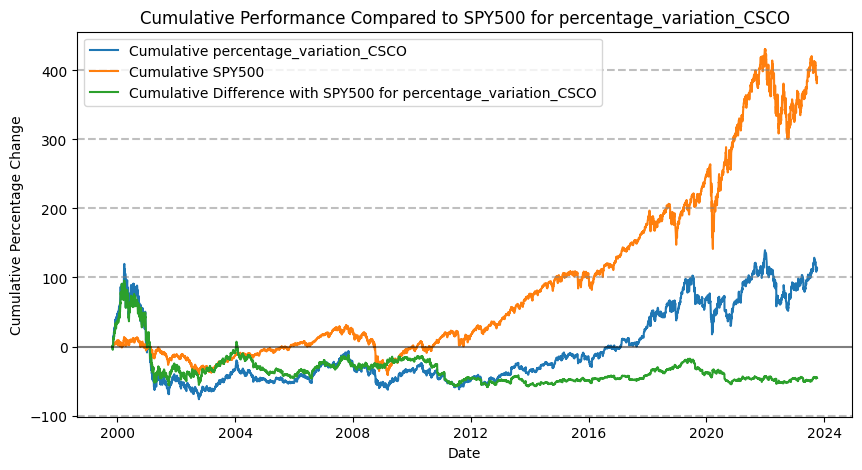

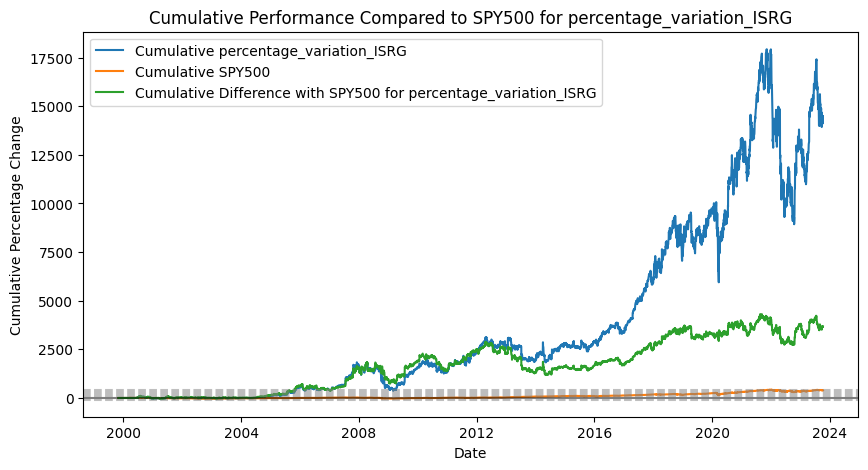

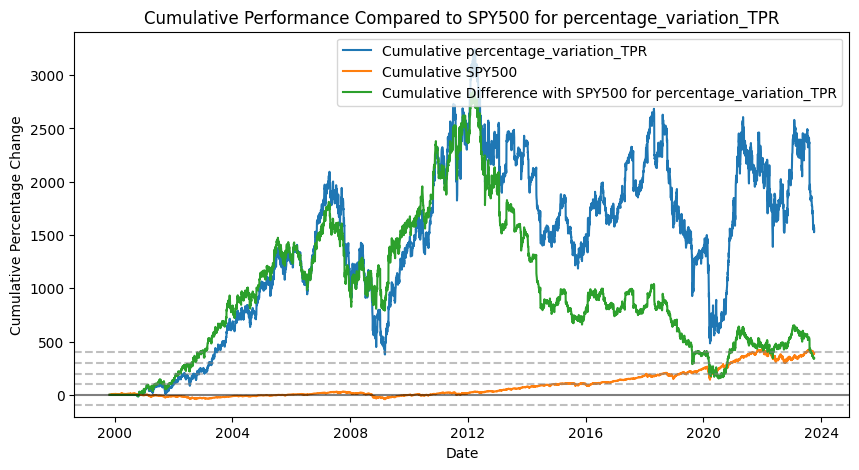

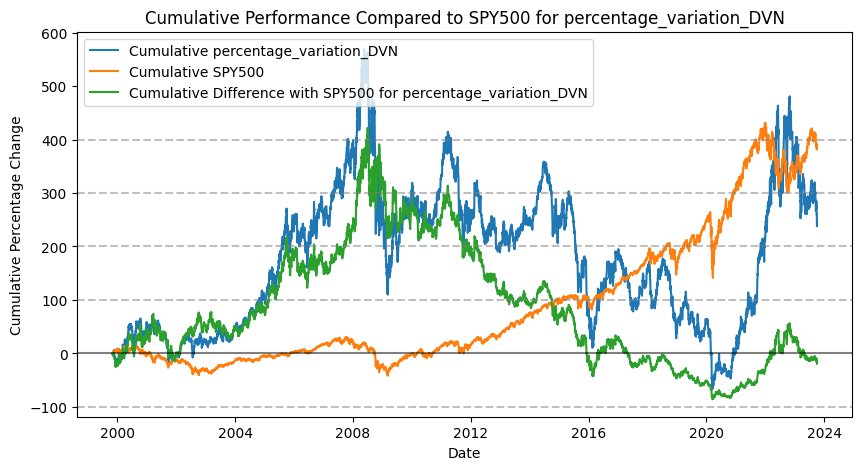

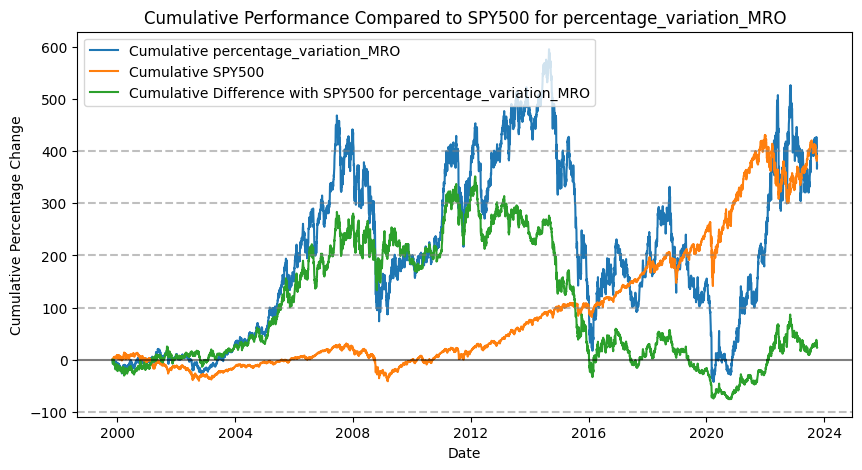

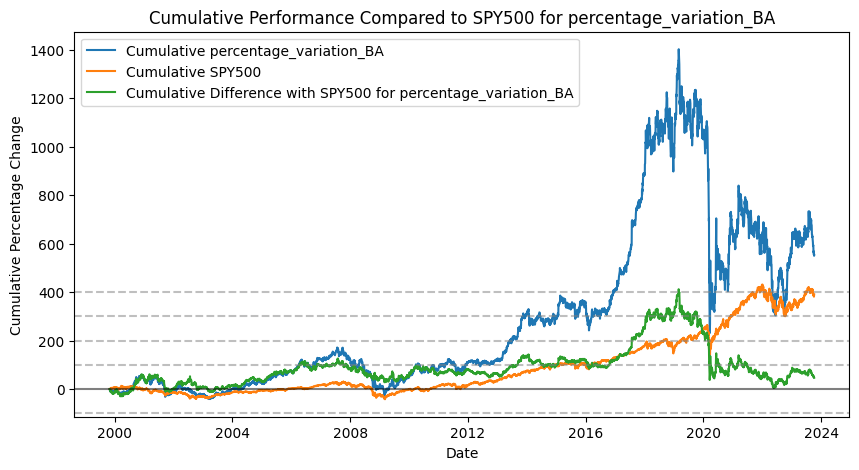

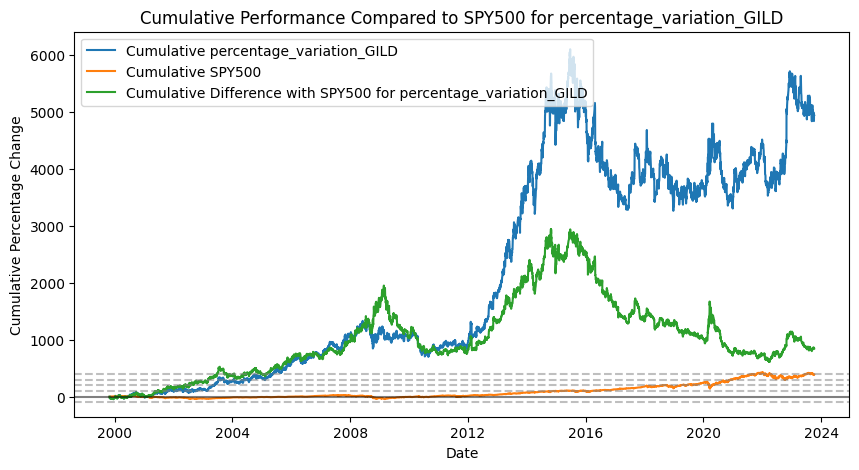

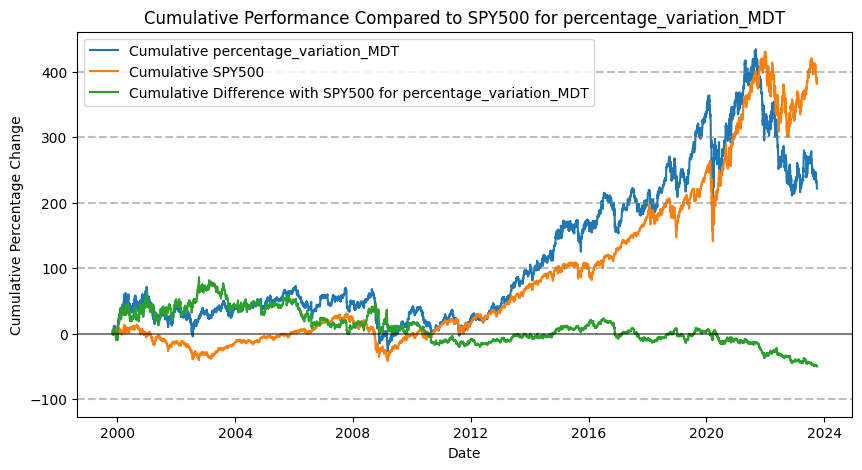

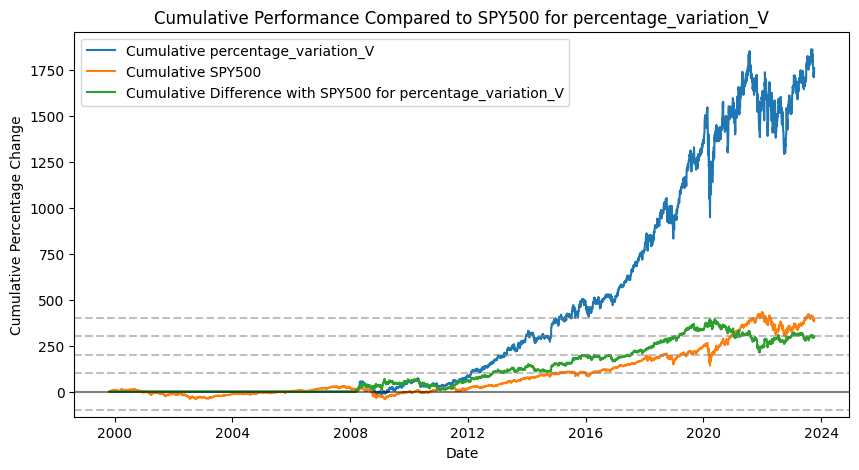

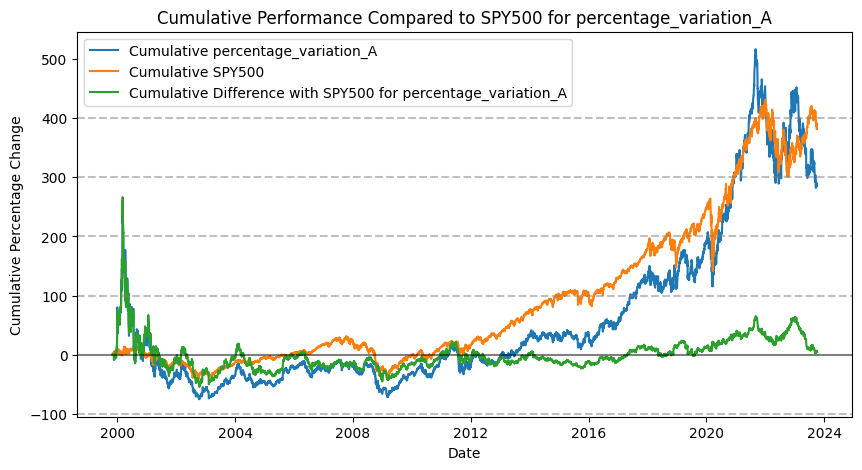

In [25]:
import matplotlib.pyplot as plt

for col in percentage_returns_df.columns[:10]:  

    # Find the first index where cumulative percentage is not zero for the current column
    nonzero_start_index = percentage_returns_df[col].ne(1).idxmax()

    col2 = col.replace('percentage_variation', 'cumulative_percentage_variation_difference_with_spy')
    # Slicing the DataFrames from the nonzero_start_index
    sliced_cumulative_percentage_col = calculate_cumulative_growth(percentage_returns_df[col].loc[nonzero_start_index:])
    sliced_cumulative_percentage_SPY500 = calculate_cumulative_growth(percentage_returns_df['percentage_variation_SPY500'].loc[nonzero_start_index:])
    sliced_cumulative_variation_difference = cumulative_percentage_variation_difference_with_SPY_df[col2].loc[nonzero_start_index:]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(sliced_cumulative_percentage_col.index, sliced_cumulative_percentage_col, label=f'Cumulative {col}')
    plt.plot(sliced_cumulative_percentage_SPY500.index, sliced_cumulative_percentage_SPY500, label='Cumulative SPY500')
    plt.plot(sliced_cumulative_variation_difference.index, sliced_cumulative_variation_difference, label=f'Cumulative Difference with SPY500 for {col}')

    plt.xlabel('Date')
    plt.ylabel('Cumulative Percentage Change')
    plt.title(f'Cumulative Performance Compared to SPY500 for {col}')

    # Add faint grey lines at y = -100, 0, 100, and 200
    for y_value in [-100, 100, 200, 300, 400]:
        plt.axhline(y=y_value, color='gray', linestyle='--', alpha=0.5)

    for y_value in [0]:
        plt.axhline(y=y_value, color='black', linestyle='-', alpha=0.5) 
    plt.legend()
    plt.show()
